# Visualizing Network Data

## Combining NetworkX with Altair

In [1]:
import networkx as nx
import nx_altair as nxa
import numpy as np

In [2]:
# Generate a random graph
G = nx.fast_gnp_random_graph(n=20, p=0.25)

In [3]:
# Compute positions for viz.
pos = nx.spring_layout(G)

# Draw the graph using Altair
viz = nxa.draw_networkx(G, pos=pos)

# Show it as an interactive plot!
viz.interactive()

alt.LayerChart(...)

In [4]:
# Add weights to nodes and edges
for n in G.nodes():
    G.nodes[n]['weight'] = np.random.randn()

for e in G.edges():
    G.edges[e]['weight'] = np.random.uniform(1, 10)


# Draw the graph using Altair
viz = nxa.draw_networkx(
    G, pos=pos,
    node_color='weight',
    cmap='viridis',
    width='weight',
    edge_color='black',
)

# Show it as an interactive plot!
viz.interactive()

alt.LayerChart(...)

In [9]:
pos = nx.circular_layout(G)
viz = nxa.draw_networkx(G, 
        pos=pos,
        node_color='weight',
        cmap='viridis',
        width='weight',
        edge_color='black',
)
viz.interactive()

alt.LayerChart(...)

In [14]:
G = nx.path_graph(12)

pos = nx.planar_layout(G)
viz = nxa.draw_networkx(G, 
        pos=pos,
)
viz.interactive()

alt.LayerChart(...)

## Vega (experimental)

cp. <https://vega.github.io/vega/examples/force-directed-layout/>

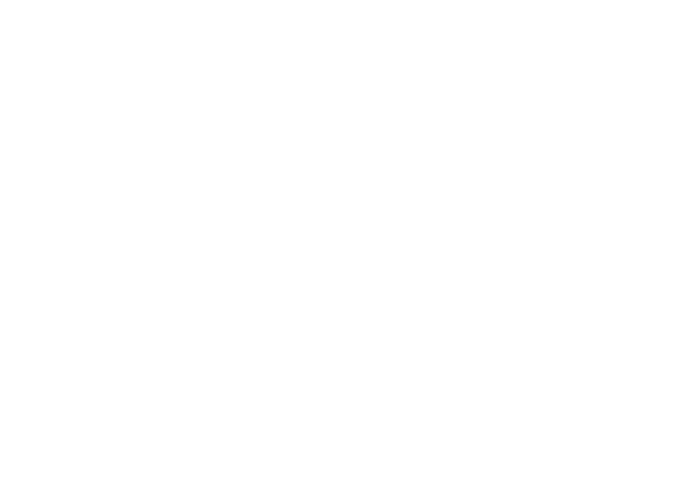

In [23]:
display({
    "application/vnd.vega.v5+json": {
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "A node-link diagram with force-directed layout, depicting character co-occurrence in the novel Les Misérables.",
  "width": 700,
  "height": 500,
  "padding": 0,
  "autosize": "none",

  "signals": [
    { "name": "cx", "update": "width / 2" },
    { "name": "cy", "update": "height / 2" },
    { "name": "nodeRadius", "value": 8,
      "bind": {"input": "range", "min": 1, "max": 50, "step": 1} },
    { "name": "nodeCharge", "value": -30,
      "bind": {"input": "range", "min":-100, "max": 10, "step": 1} },
    { "name": "linkDistance", "value": 30,
      "bind": {"input": "range", "min": 5, "max": 100, "step": 1} },
    { "name": "static", "value": True,
      "bind": {"input": "checkbox"} },
    {
      "description": "State variable for active node fix status.",
      "name": "fix", "value": False,
      "on": [
        {
          "events": "symbol:mouseout[!event.buttons], window:mouseup",
          "update": "false"
        },
        {
          "events": "symbol:mouseover",
          "update": "fix || true"
        },
        {
          "events": "[symbol:mousedown, window:mouseup] > window:mousemove!",
          "update": "xy()",
          "force": True
        }
      ]
    },
    {
      "description": "Graph node most recently interacted with.",
      "name": "node", "value": "",
      "on": [
        {
          "events": "symbol:mouseover",
          "update": "fix === true ? item() : node"
        }
      ]
    },
    {
      "description": "Flag to restart Force simulation upon data changes.",
      "name": "restart", "value": False,
      "on": [
        {"events": {"signal": "fix"}, "update": "fix && fix.length"}
      ]
    }
  ],

  "data": [
    {
      "name": "node-data",
      "url": "data/miserables.json",
      "format": {"type": "json", "property": "nodes"}
    },
    {
      "name": "link-data",
      "url": "data/miserables.json",
      "format": {"type": "json", "property": "links"}
    }
  ],

  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "node-data", "field": "group"},
      "range": {"scheme": "category20c"}
    }
  ],

  "marks": [
    {
      "name": "nodes",
      "type": "symbol",
      "zindex": 1,

      "from": {"data": "node-data"},
      "on": [
        {
          "trigger": "fix",
          "modify": "node",
          "values": "fix === true ? {fx: node.x, fy: node.y} : {fx: fix[0], fy: fix[1]}"
        },
        {
          "trigger": "!fix",
          "modify": "node", "values": "{fx: null, fy: null}"
        }
      ],

      "encode": {
        "enter": {
          "fill": {"scale": "color", "field": "group"},
          "stroke": {"value": "white"}
        },
        "update": {
          "size": {"signal": "2 * nodeRadius * nodeRadius"},
          "cursor": {"value": "pointer"}
        }
      },

      "transform": [
        {
          "type": "force",
          "iterations": 300,
          "restart": {"signal": "restart"},
          "static": {"signal": "static"},
          "signal": "force",
          "forces": [
            {"force": "center", "x": {"signal": "cx"}, "y": {"signal": "cy"}},
            {"force": "collide", "radius": {"signal": "nodeRadius"}},
            {"force": "nbody", "strength": {"signal": "nodeCharge"}},
            {"force": "link", "links": "link-data", "distance": {"signal": "linkDistance"}}
          ]
        }
      ]
    },
    {
      "type": "path",
      "from": {"data": "link-data"},
      "interactive": False,
      "encode": {
        "update": {
          "stroke": {"value": "#ccc"},
          "strokeWidth": {"value": 0.5}
        }
      },
      "transform": [
        {
          "type": "linkpath",
          "require": {"signal": "force"},
          "shape": "line",
          "sourceX": "datum.source.x", "sourceY": "datum.source.y",
          "targetX": "datum.target.x", "targetY": "datum.target.y"
        }
      ]
    }
  ]
}
}, raw=True)